In [114]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
dataset = pd.read_csv("./train.csv")

In [116]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
label_train = dataset.iloc[:,0].values

In [118]:
train = dataset.iloc[:,1:].values

In [119]:
test = pd.read_csv("test.csv").values

In [120]:
# convert to array, specify data type, and reshape
label_train = label_train.astype(np.uint8)
train = np.array(train).reshape((-1, 28, 28, 1)).astype(np.uint8)
test = np.array(test).reshape((-1, 28, 28, 1)).astype(np.uint8)
test.shape

(28000, 28, 28, 1)

In [121]:
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split

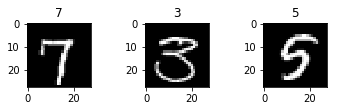

In [122]:
for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(train[i,:,:,0], cmap=plt.get_cmap('gray'))
    plt.title(label_train[i]);

In [123]:
#expand 1 more dimention as 1 for colour channel gray
train = train.reshape(train.shape[0], 28, 28,1)
train.shape

(42000, 28, 28, 1)

In [124]:
test = test.reshape(test.shape[0], 28, 28,1)
test.shape

(28000, 28, 28, 1)

In [125]:
mean = train.mean().astype(np.float32)
std = train.std().astype(np.float32)

def standardize(x): 
    return (x-mean)/std

In [126]:
label_train.shape

(42000,)

In [127]:
from keras.utils.np_utils import to_categorical
label_train = to_categorical(label_train)
num_classes = label_train.shape[1]
num_classes

10

([<matplotlib.axis.XTick at 0x7f783d111630>,
 <a list of 10 Text xticklabel objects>)

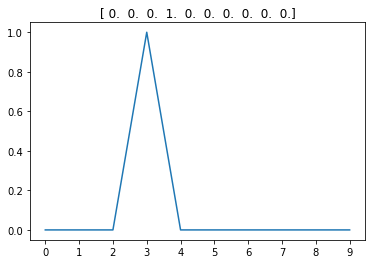

In [128]:
plt.title(label_train[9])
plt.plot(label_train[9])
plt.xticks(range(10))

In [129]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [130]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [131]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)
